Importing Libraries

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

Loading the data

In [96]:
res = pd.read_csv('data.csv')  

The last the 5 rows

In [98]:
res.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
506,0.98765,0.0,12.5,0,0.561,6.980,89.0,2.098,3,320,23.0,396.0,12.0,12.0
507,0.23456,0.0,12.5,0,0.561,6.980,76.0,2.654,3,320,23.0,343.0,25.0,32.0
508,0.44433,0.0,12.5,0,0.561,6.123,98.0,2.987,3,320,23.0,343.0,21.0,54.0
509,0.77763,0.0,12.7,0,0.561,6.222,34.0,2.543,3,329,23.0,343.0,76.0,67.0
510,0.65432,0.0,12.8,0,0.561,6.760,67.0,2.987,3,345,23.0,321.0,45.0,24.0


Clean the data

In [99]:
res.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [100]:
res = res.dropna()

In [101]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

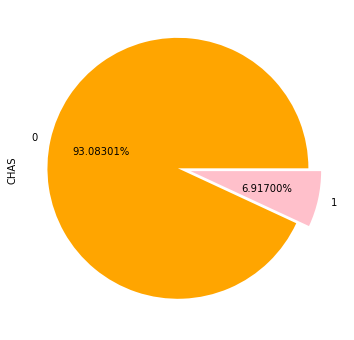

In [102]:
res.CHAS.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                                colors=['orange', 'pink'], explode=(0.05,0.05))

Split the data into train and test

In [103]:
train_set = res.sample(frac=0.8, random_state=0)
test_set = res.drop(train_set.index)

Inspect the data

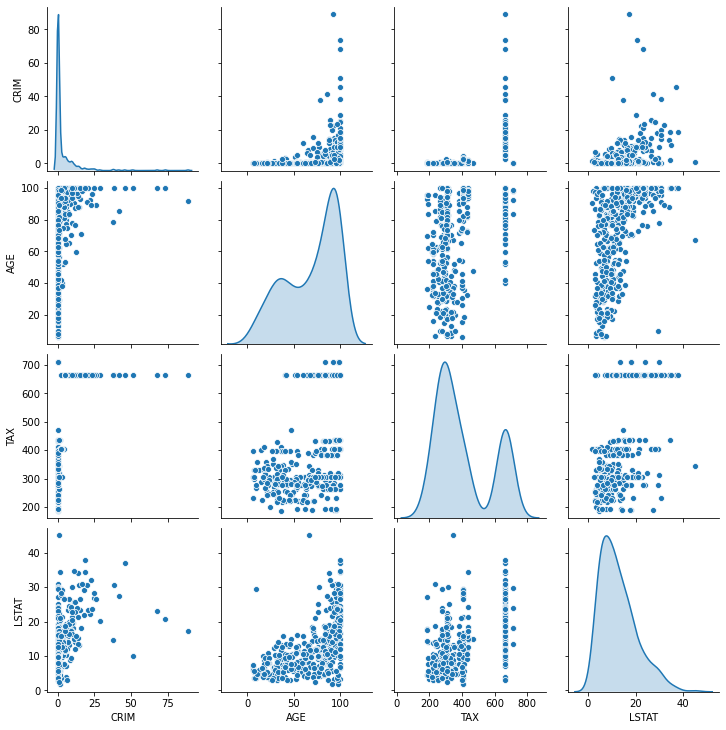

In [104]:
sns.pairplot(train_set[['CRIM', 'AGE', 'TAX', 'LSTAT']], diag_kind='kde')

Also look at the overall statistics

In [105]:
train_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.758249,9.254940,0.00632,0.08308,0.28955,3.56868,88.9762
ZN,405.0,11.416049,23.118140,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,405.0,11.090889,6.813314,0.46000,5.19000,9.69000,18.10000,27.7400
CHAS,405.0,0.071605,0.258152,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,405.0,0.555703,0.116478,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.272249,0.718231,3.56100,5.87800,6.19500,6.62900,8.7250
AGE,405.0,69.120247,28.236206,6.00000,45.10000,78.70000,94.40000,100.0000
DIS,405.0,3.776950,2.152323,1.12960,2.06510,3.18270,5.11670,12.1265
RAD,405.0,9.454321,8.626807,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,407.493827,167.111788,187.00000,281.00000,330.00000,666.00000,711.0000


Separate the target value, the label from the features.

In [106]:
train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('CHAS')
test_labels = test_features.pop('CHAS')

In [107]:
train_features[:5]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
334,0.03738,0.0,5.19,0.515,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7
376,15.28800,0.0,18.10,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,23.24,13.9
224,0.31533,0.0,6.20,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
408,7.40389,0.0,18.10,0.597,5.617,97.9,1.4547,24,666,20.2,314.64,26.40,17.2
81,0.04462,25.0,4.86,0.426,6.619,70.4,5.4007,4,281,19.0,395.63,7.22,23.9


Normalization

In [108]:
train_set.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.758249,9.254940
ZN,11.416049,23.118140
INDUS,11.090889,6.813314
CHAS,0.071605,0.258152
NOX,0.555703,0.116478
RM,6.272249,0.718231
AGE,69.120247,28.236206
DIS,3.776950,2.152323
RAD,9.454321,8.626807
TAX,407.493827,167.111788


The normalization layer

The first step is to create the layer

In [109]:
normalizer = preprocessing.Normalization()

Then .adapt it to the data

In [110]:
normalizer.adapt(np.array(train_features))

This calculates the mean and variance, and stores them in the layer

In [111]:
print(normalizer.mean.numpy())

[  3.758  11.416  11.091   0.556   6.272  69.12    3.777   9.454 407.494
  18.492 358.032  12.817  22.752]


With each feature independently normalized

In [112]:
first = np.array(train_features[: 1])

with np.printoptions(precision = 2, suppress = True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[  0.04   0.     5.19   0.52   6.31  38.5    6.46   5.   224.    20.2
  389.4    6.75  20.7 ]]

Normalized: [[-0.4  -0.49 -0.87 -0.35  0.05 -1.09  1.25 -0.52 -1.1   0.78  0.35 -0.8
  -0.22]]


Linear Regression

Build the model

In [113]:
linear_model = tf.keras.Sequential([normalizer, layers.Dense(units=1)])


model on a batch of inputs

In [114]:
linear_model.predict(train_features[:10])


array([[ 1.   ],
       [-0.233],
       [-0.669],
       [-0.554],
       [ 0.241],
       [ 1.035],
       [-1.39 ],
       [ 0.48 ],
       [ 0.094],
       [-0.437]], dtype=float32)

 weight matrices

In [116]:
linear_model.layers[1].kernel

<tf.Variable 'sequential_9/dense_17/kernel:0' shape=(13, 1) dtype=float32, numpy=
array([[ 0.304],
       [ 0.009],
       [-0.278],
       [-0.033],
       [-0.172],
       [-0.408],
       [-0.078],
       [ 0.364],
       [-0.215],
       [ 0.127],
       [-0.03 ],
       [-0.425],
       [-0.287]], dtype=float32)>

Use the same compile and fit calls

In [122]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')


In [123]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


CPU times: user 10.6 s, sys: 8 s, total: 18.6 s
Wall time: 6.4 s


Visualize the model's training

In [124]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 3])
    plt.xlabel('Epoch')
    plt.ylabel('Error [AGE]')
    plt.legend()
    plt.grid(True)


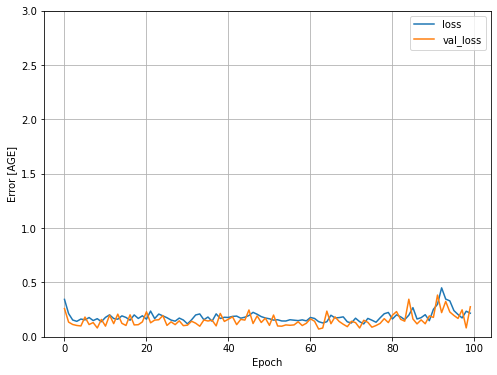

In [125]:
plot_loss(history)


Collect the results on the test set

In [127]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)


A DNN regression

Build the model 

In [128]:
def build_and_compile_model(norm):
    model = keras.Sequential([norm, layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'), layers.Dense(1)])
    
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [129]:
dnn_model = build_and_compile_model(normalizer)


In [130]:
%%time
history = dnn_model.fit(train_features, train_labels, validation_split=0.2, verbose=0, epochs=100)


CPU times: user 13.8 s, sys: 10.6 s, total: 24.4 s
Wall time: 8.28 s


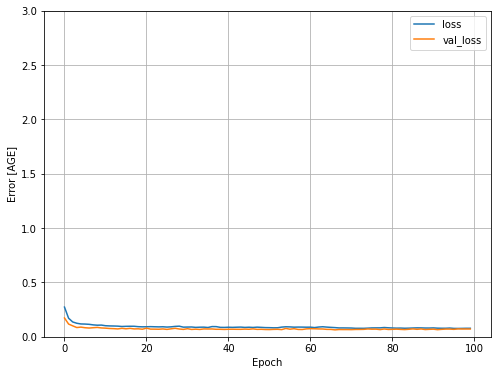

In [131]:
plot_loss(history)
